In [4]:
import stim 
import sinter 
from typing import List

In [ ]:
tasks = [
    sinter.Task(
        circuit=stim.Circuit.generated(
            "surface_code:rotated_memory_x",
            rounds=d,
            distance=d,
            before_measure_flip_probability=noise,
        ),
        json_metadata={'d': d, 'p': noise},
    )
    for d in [3, 5, 7, 9]
    for noise in [0.005, 0.01, 0.015, 0.03, 0.04, 0.06, 0.1, 0.2]
]

collected_stats = sinter.collect(
    num_workers=48,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=10000000000,
    max_errors=1000,
)

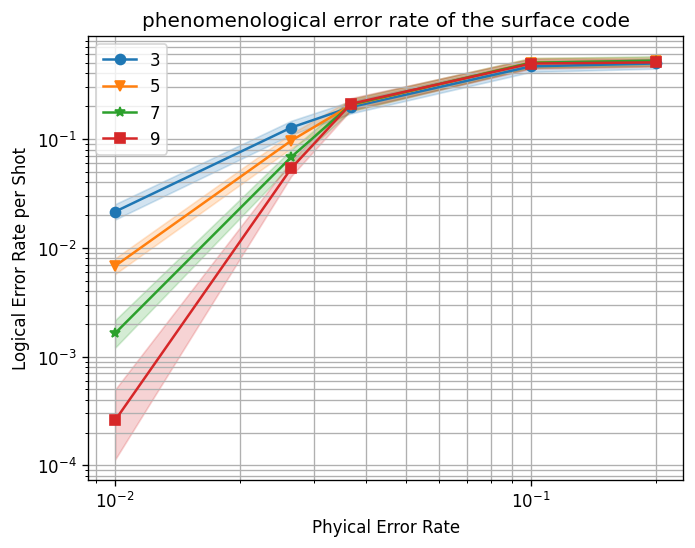

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
)
# ax.set_ylim(1e-4, 1e-0)
# ax.set_xlim(5e-2, 5e-1)
ax.loglog()
ax.axvline(x=0.015, linestyle='--', linewidth=2, label='plaq = 1.5%')
ax.set_xlabel("Plaquette Error Rate")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger